In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import patches as ptc 
import math
import random
from tensorflow.keras.utils import plot_model

from PIL import Image
import os



In [2]:
(x_train0, y_train0), (x_test0, y_test0) = tf.keras.datasets.mnist.load_data()

x_train = np.asarray(x_train0, dtype=np.float32).reshape(60000, 28*28) / 255.0
x_test = np.asarray(x_test0, dtype=np.float32).reshape(10000, 28*28) / 255.0
y_train = np.asarray(y_train0, dtype=np.int32)
y_test = np.asarray(y_test0, dtype=np.int32)

y_train_onehot =  tf.one_hot( y_train, depth=10, dtype=tf.float32)
y_test_onehot =  tf.one_hot( y_test, depth=10, dtype=tf.float32)   


Text(0.5, 1.0, 'Label: 2')

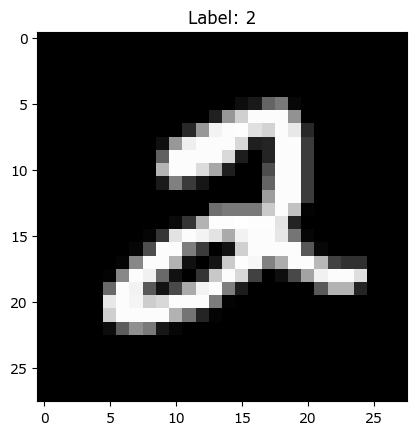

In [3]:
num_img = 5
plt.imshow(x_train0[num_img], cmap='gray')
plt.title(f"Label: {y_train0[num_img]}")


In [4]:
print(x_train.shape)
print(y_train_onehot.shape)


(60000, 784)
(60000, 10)


# Why we use TensorFlow?
* Our code will run on GPUs (Not today's tutorial)! Much faster training. 
* We want you to be ready to use the framework for your project so you can experiment more efficiently than with the code we wrote by hand. 
* We want you to stand on the shoulders of giants! TensorFlow and PyTorch are both excellent frameworks that will make your lives a lot easier :)
 

# Keras Sequential API
In Keras, there's easy way to define the neural network which is expressed as a sequential stack of layers, with the outpupt of each layer fed to the next layer as input. Simply call the `tf.keras.Sequential` constructor with a list containing a sequence of layer objects.


To define each layers, we will pick one type of layer from `tf.keras.layers`. 



In [5]:
def two_layer_net():
    model = tf.keras.Sequential(layers = [
        tf.keras.layers.InputLayer(input_shape=(28,28,1),name = 'input'),
        tf.keras.layers.Conv2D(5, 3,activation= 'relu',name = 'conv'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax',name = 'output')
    ])

    return model

In [6]:
model = two_layer_net()
model.summary()
#tf.keras.utils.plot_model(model, "model.png")
#plot_model(model, to_file = 'neuralnet_model.png', show_shapes=True, show_layer_names=True)

c:\Academics\CS courses\CSC-338\ML\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv (Conv2D)                   │ (None, 26, 26, 5)      │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3380)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │        33,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,860 (132.27 KB)

 Trainable params: 33,860 (132.27 KB)

 Non-trainable params: 0 (0.00 B)

To train the network, we defined the loss function (ex.MSE or CrossEntropy) and minimize the loss function using the Stochastic Gradient Decent, which requires to compute the gradient of loss function with respect to each weights and bias. The way of computing each gradient is called back-progagation.  In Keras seqeuntial API, `.complie()` deals with every jobs above. 


In [7]:
def two_layer_net():
    model = tf.keras.Sequential(layers = [
        tf.keras.layers.InputLayer(input_shape=(28,28,1),name = 'input'),
        tf.keras.layers.Conv2D(5, 3, activation= 'relu',name = 'conv'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax',name = 'output')
              

    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [8]:
x_train0.shape

(60000, 28, 28)

Once we decide the complier, we need to train the model by fitting on the training data. 

In [9]:
model = two_layer_net()
training_history = model.fit(x_train0.reshape(60000,28,28,1), y_train_onehot, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9108 - loss: 1.2264
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9643 - loss: 0.1276
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9724 - loss: 0.0906
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9746 - loss: 0.0791
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9783 - loss: 0.0673
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9820 - loss: 0.0560
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9836 - loss: 0.0505
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9861 - loss: 0.0456
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0387
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9899 - loss: 0.0347


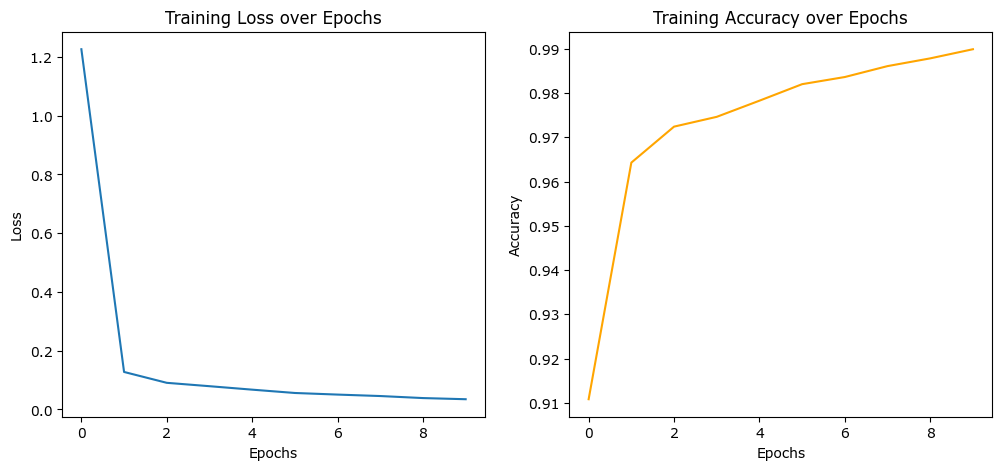

In [10]:
Loss = training_history.history['loss']
Accuracy = training_history.history['accuracy']
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(Loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
              

plt.subplot(1, 2, 2)
plt.plot(Accuracy, label='Training Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')

plt.show()      

In [11]:
model.evaluate(x_test.reshape(10000,28,28,1), y_test_onehot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1141 - loss: 2.2550


[2.25504469871521, 0.11410000175237656]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


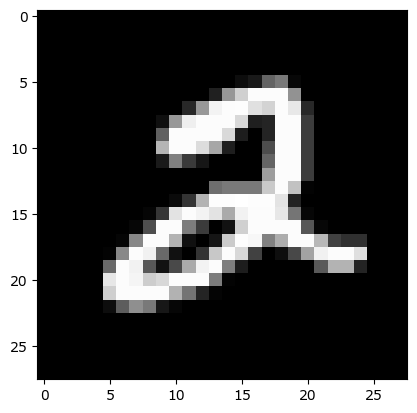

In [12]:
plt.imshow(x_train0[5], cmap='gray')
pred = model.predict(x_train[5:6].reshape(1,28,28))

In [13]:
pred

array([[0.08204444, 0.16209793, 0.10729877, 0.10469215, 0.12771852,
        0.08877469, 0.08290004, 0.09088106, 0.06553366, 0.08805872]],
      dtype=float32)

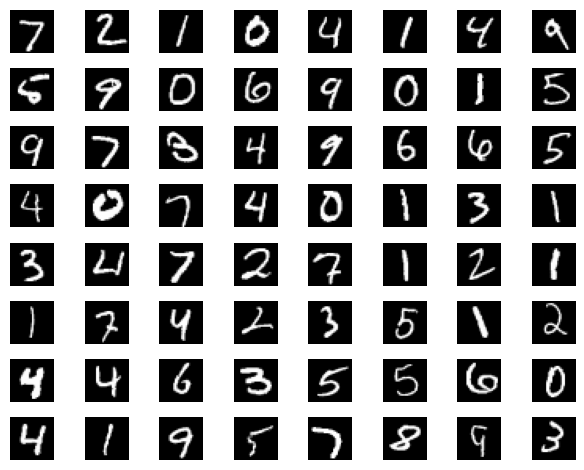

In [14]:
for i, img in enumerate(x_test0[0:64]):
    plt.subplot(8, 8, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    #prediction = model.predict(x_test[i:i+1])
    #pred_label = np.argmax(prediction)
    
    #plt.title(f' {pred_label,np.round(prediction[0,pred_label],decimals=3)}')
    plt.tight_layout()
        

In [15]:
filters = model.layers[0].get_weights()[0]
np.shape(filters)

(3, 3, 1, 5)

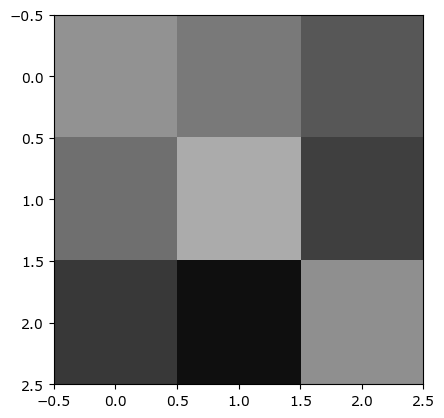

In [16]:
m = np.abs(filters).max()
plt.imshow(filters[:,:,:,0].reshape(3,3), cmap='gray', vmin=-m, vmax=m)

NameError: name 'weights' is not defined

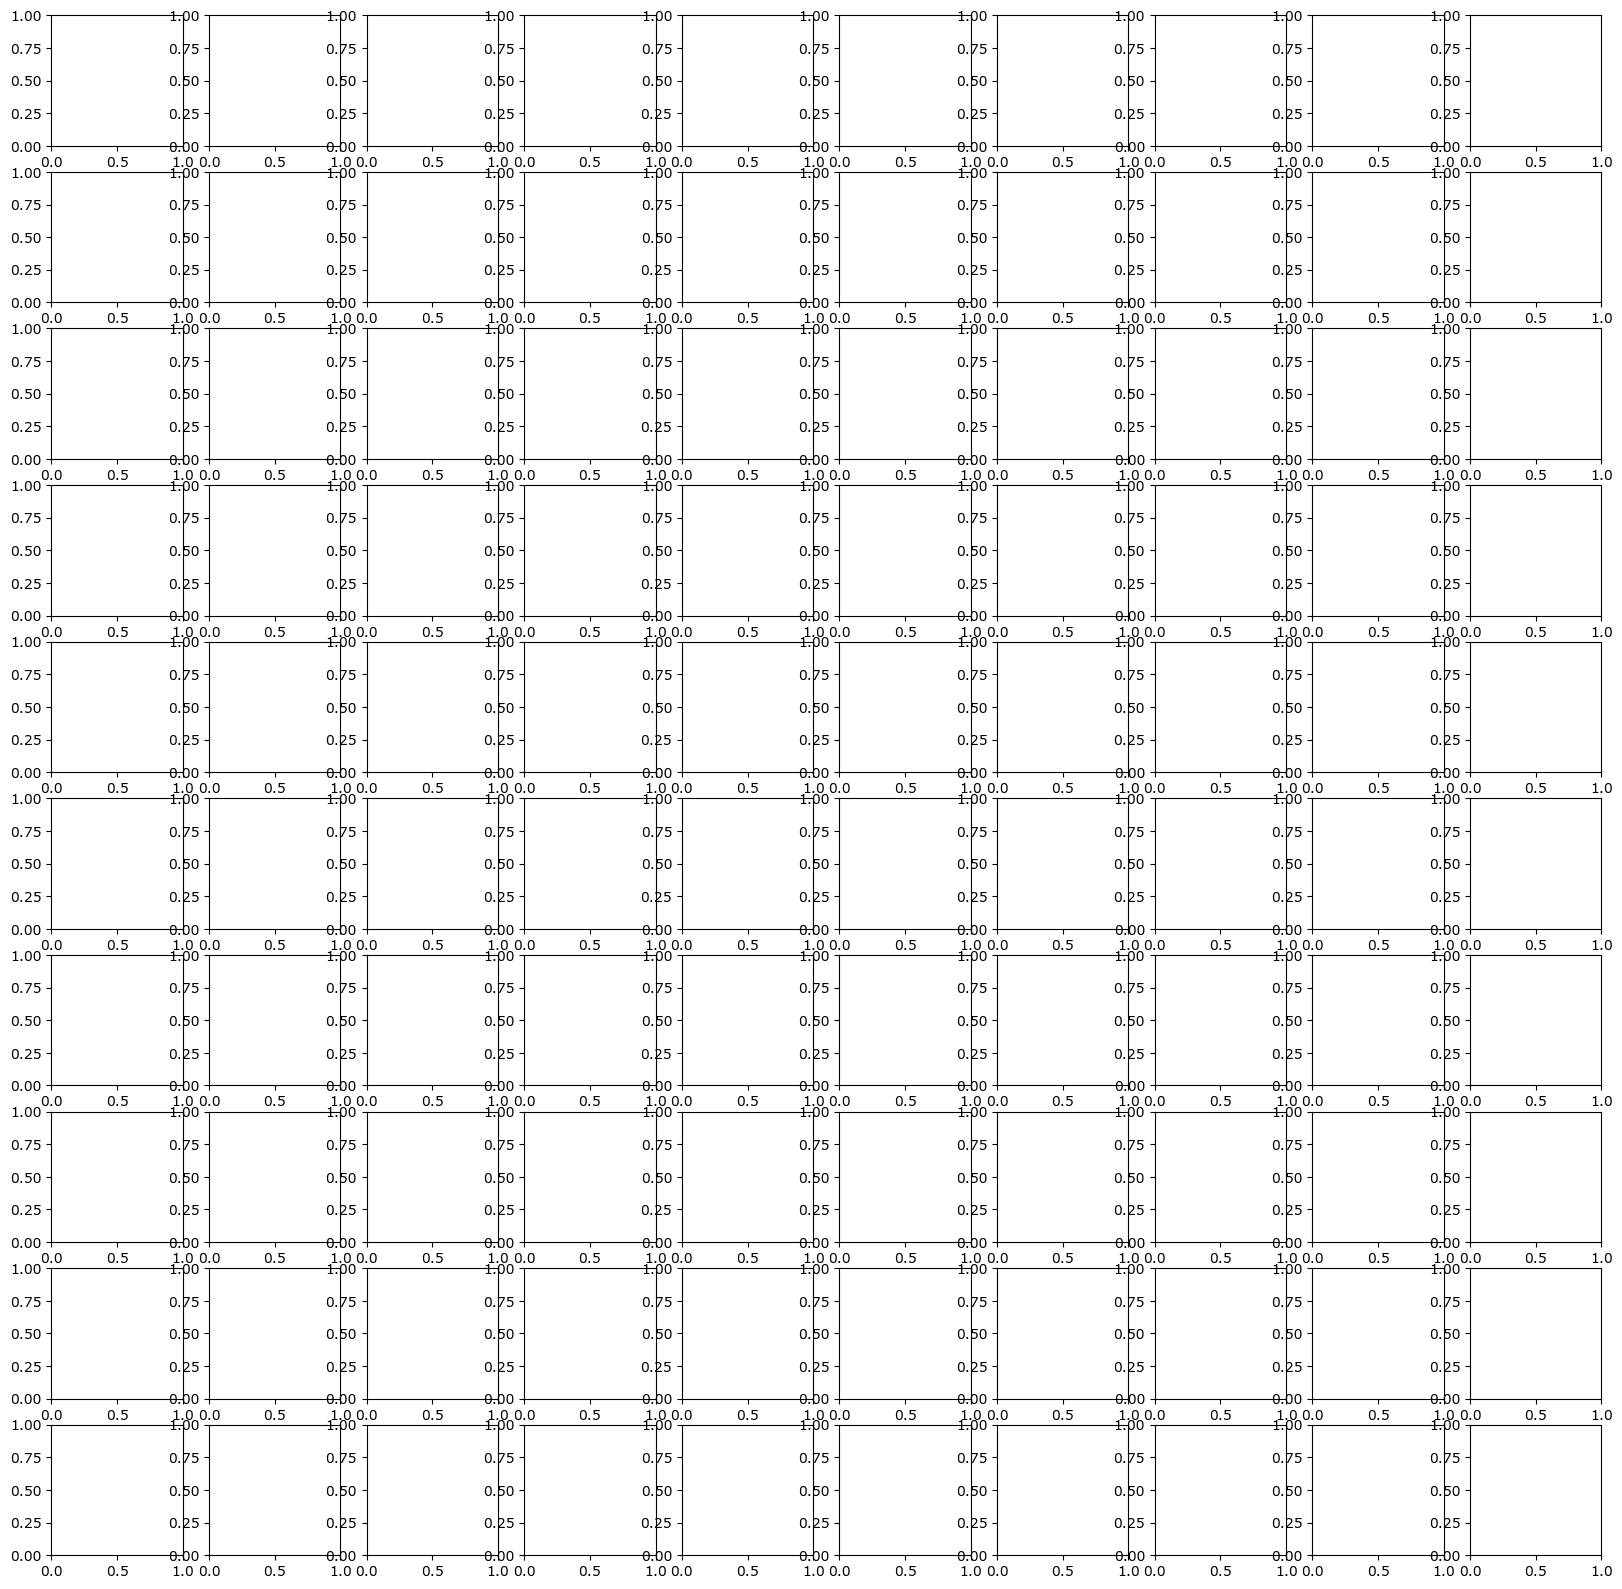

In [17]:
cols = 10
rows = 10
fig, axes = plt.subplots(rows, cols, figsize=(20,20))
idxs = range(rows*cols)
m = np.abs(weights).max()
for ax, j in zip(axes.ravel(), idxs):
    ax.imshow(weights[:, j].reshape(28,28), cmap='gray', vmin=-m, vmax=m)
    ax.set_title(str(j), fontsize=8)
    ax.axis('off')
plt.suptitle("hidden1 weights")
plt.tight_layout()
plt.show()

## Convolutional Neural Network

In [18]:

def convolution(input, filter):
    r_filter, c_filter = filter.shape
    row = input.shape[0] - r_filter + 1
    col = input.shape[1] - c_filter + 1
   
    output = np.zeros((row, col))

    for i in range(row):
        for j in range(col):
            part = input[i:i+r_filter,j:j+c_filter]
            output[i,j] = (filter* part).sum()

    return output



In [19]:
Image = np.array([[0, 0, 1, 0],[0, 1,0.5,0], [1,0,1,0],[1,0.5,1,1]])
Filter = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
Output = convolution(Image, Filter)
Filter

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

TypeError: Image data of dtype object cannot be converted to float

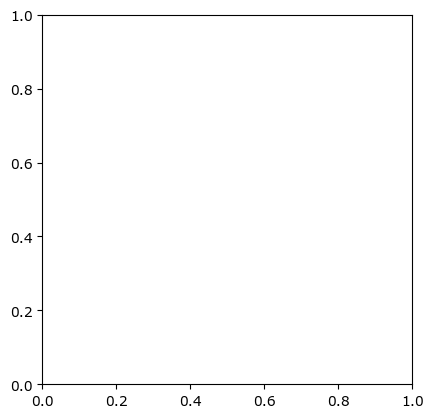

In [20]:

num_img0 =1
input0 = x_train0[num_img0]
plt.imshow(input, cmap='gray')

plt.title('size of image is %d x %d '%(input0.shape[0], input0.shape[1]),fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Size of image is 26 x 26 ')

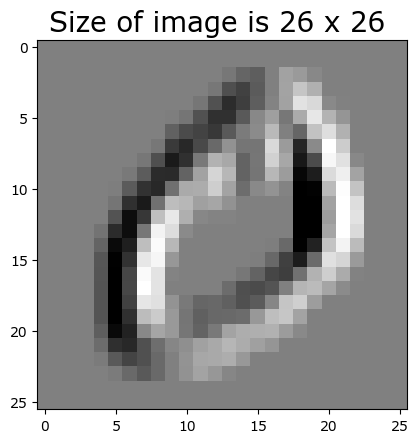

In [21]:
output = convolution(input0, Filter)
plt.imshow(output, cmap='gray')
#plt.title('what is the size of output?',fontsize = 20)
plt.title('Size of image is %d x %d '%(output.shape[0], output.shape[1]),fontsize = 20)

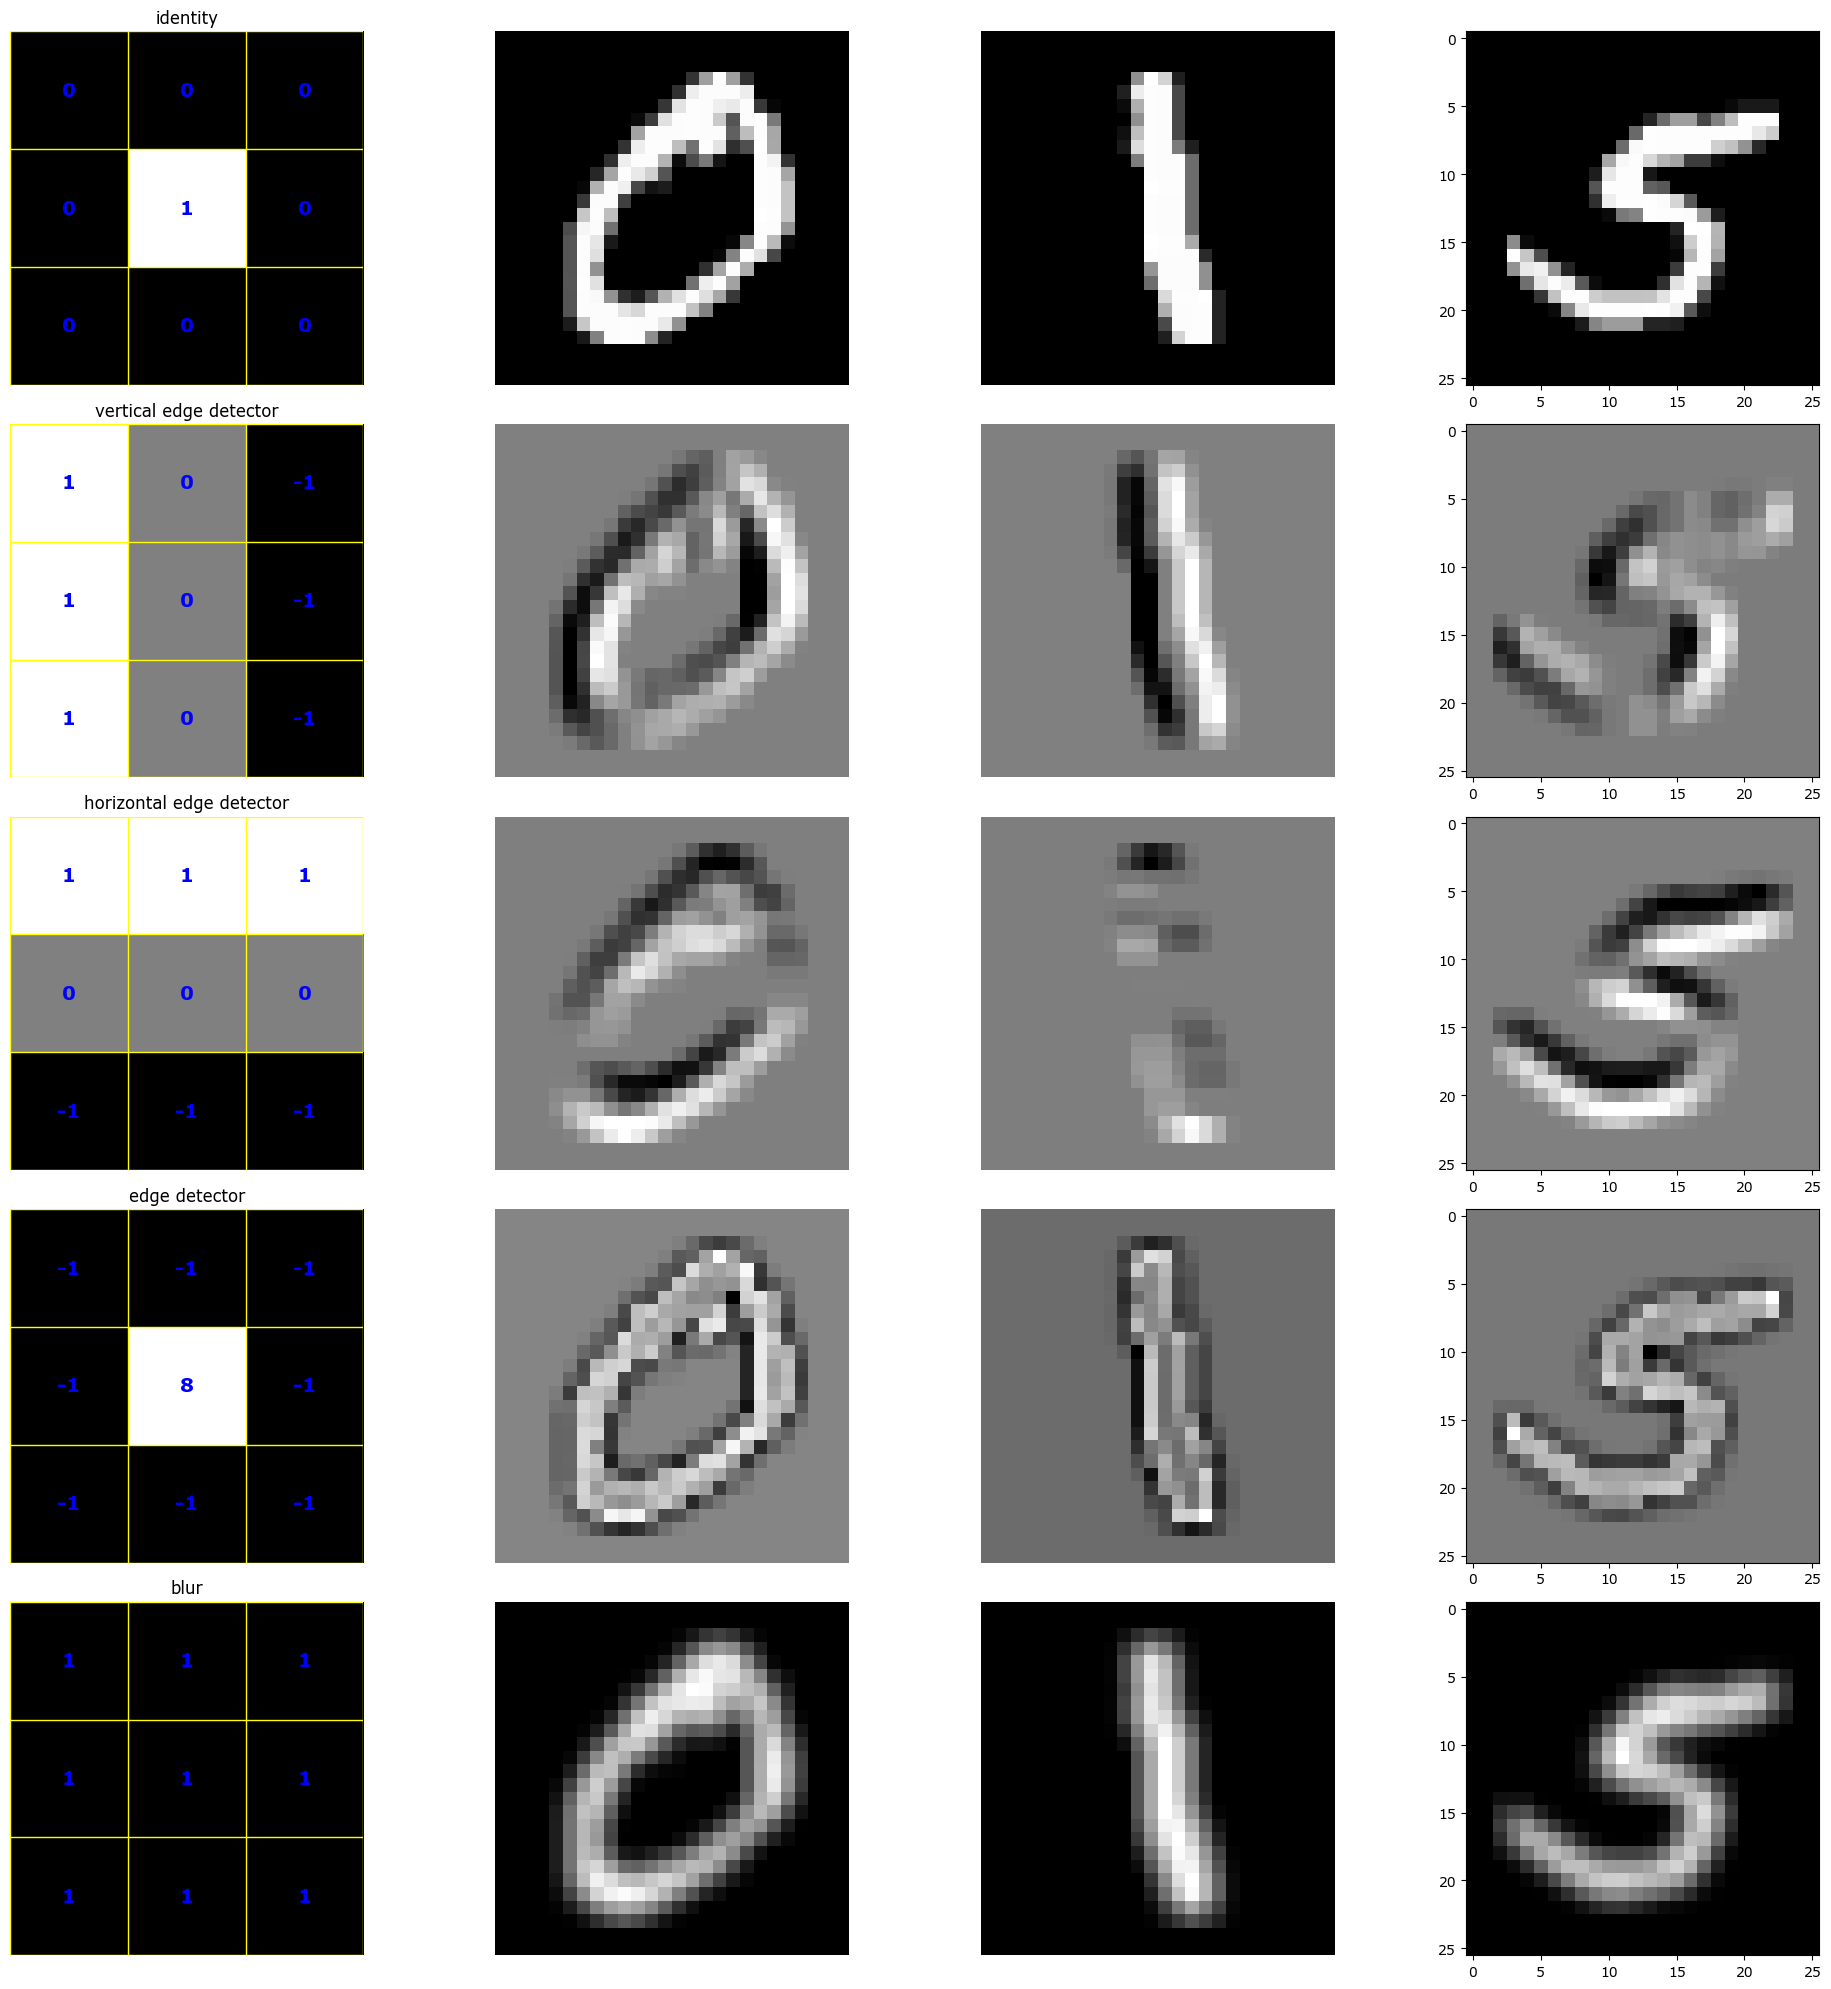

In [22]:
filters = [np.array([[0,0,0],[0,1,0],[0,0,0]]),np.array([[1,0,-1],[1,0,-1],[1,0,-1]]), np.array([[1,1,1],[0,0,0],[-1,-1,-1]]), np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]),np.array([[1,1,1],[1,1,1],[1,1,1]])] #np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])]  
name_filters = ['identity', 'vertical edge detector', 'horizontal edge detector', 'edge detector', 'blur']
cols = 4
rows = 5

num_img1 =6
input1 = x_train0[num_img1]

num_img5 =239
input5 = x_train0[num_img5]

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))

for i in range(rows):
    filter = filters[i] 
    axes[ i,0].imshow(filters[i], cmap='gray')
    axes[ i,0].set_title(name_filters[i])
    axes[ i,0].axis('off')

    
    for x in range(filter.shape[1] + 1):
        axes[i,0].axvline(x - 0.5, color='yellow', linewidth=1)
    for y in range(filter.shape[0] + 1):
        axes[i,0].axhline(y - 0.5, color='yellow', linewidth=1)
        
    
    for y in range(filter.shape[0]):
        for x in range(filter.shape[1]):
            axes[i,0].text(x, y, f"{filter[y, x]:.0f}",
                    ha='center', va='center', color='blue',
                    fontsize=14, fontweight='bold')

    # Right: output
    axes[i,1].imshow(convolution(input0,filter), cmap='gray')
    axes[i,1].axis('off')
    axes[i,2].imshow(convolution(input1,filter), cmap='gray')
    axes[i,2].axis('off')
    axes[i,3].imshow(convolution(input5,filter), cmap='gray')
   
    
plt.tight_layout()

AttributeError: 'function' object has no attribute 'shape'

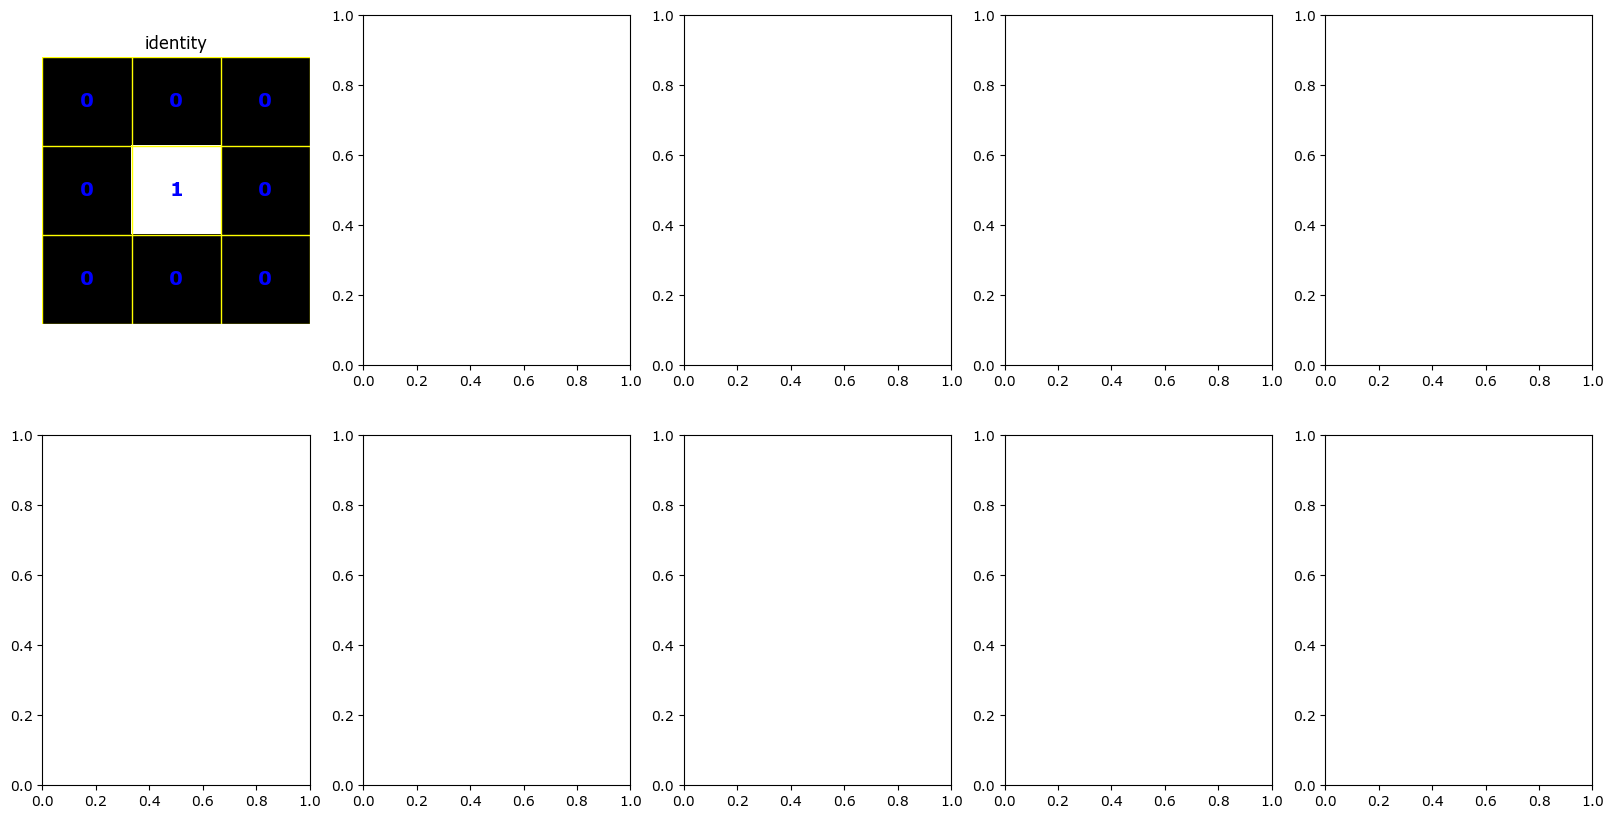

In [23]:
filters = [np.array([[0,0,0],[0,1,0],[0,0,0]]),np.array([[1,0,-1],[1,0,-1],[1,0,-1]]), np.array([[1,1,1],[0,0,0],[-1,-1,-1]]), np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]),np.array([[1,1,1],[1,1,1],[1,1,1]])] #np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])]  
name_filters = ['identity', 'vertical edge detector', 'horizontal edge detector', 'edge detector', 'blur']
cols = 5
rows = 2
fig, axes = plt.subplots(rows, cols, figsize=(20, 10))

for i in range(cols):
    filter = filters[i] 
    axes[ 0,i].imshow(filters[i], cmap='gray')
    axes[ 0,i].set_title(name_filters[i])
    axes[ 0,i].axis('off')

    
    for x in range(filter.shape[1] + 1):
        axes[0,i].axvline(x - 0.5, color='yellow', linewidth=1)
    for y in range(filter.shape[0] + 1):
        axes[0,i].axhline(y - 0.5, color='yellow', linewidth=1)
        
    
    for y in range(filter.shape[0]):
        for x in range(filter.shape[1]):
            axes[0,i].text(x, y, f"{filter[y, x]:.0f}",
                    ha='center', va='center', color='blue',
                    fontsize=14, fontweight='bold')

    # Right: output
    axes[1,i].imshow(convolution(input,filter), cmap='gray')
    axes[1,i].axis('off')
    
plt.tight_layout()

In [ ]:
np.where(y_train == 1)[0][:10]

In [ ]:

num_img0 =239
input0 = x_train0[num_img0]
plt.imshow(input0, cmap='gray')

In [ ]:
np.where(y_train == 5)[0][:20]

# Tensorflow for CNN

In [24]:
(x_train0, y_train0), (x_test0, y_test0) = tf.keras.datasets.mnist.load_data()

x_train = x_train0.reshape(60000, 28, 28, 1).astype("float32") / 255.0
x_test = x_test0.reshape(10000, 28, 28, 1).astype("float32") / 255.0
y_train = np.asarray(y_train0, dtype=np.int32)
y_test = np.asarray(y_test0, dtype=np.int32)

y_train_onehot =  tf.one_hot( y_train, depth=10, dtype=tf.float32)
y_test_onehot =  tf.one_hot( y_test, depth=10, dtype=tf.float32)

In [25]:
def two_layer_cov():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(28, 28, 1), name='input'),
        tf.keras.layers.Conv2D(5, 7, activation='relu', strides = 2, name='conv1'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax', name='output')
    ])
    return model

In [26]:
model2 = two_layer_cov()
plot_model(model2, to_file = 'neuralnet_model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [28]:
model2 = two_layer_cov()
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


training_history2 = model2.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9146 - loss: 0.2994
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9616 - loss: 0.1333
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9699 - loss: 0.1044
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9744 - loss: 0.0884
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9773 - loss: 0.0772
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9799 - loss: 0.0679
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9816 - loss: 0.0619
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9834 - loss: 0.0564
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9838 - loss: 0.0521
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9849 - loss: 0.0497


In [ ]:
test_loss, test_acc = model2.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

In [ ]:
Loss = training_history2.history['loss']
Accuracy = training_history2.history['accuracy']
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(Loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
              

plt.subplot(1, 2, 2)
plt.plot(Accuracy, label='Training Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy over Epochs')

plt.show()    

In [ ]:
filters = model2.layers[0].get_weights()[0]

#[0].get_weights()[0]
#np.shape(filters)

In [ ]:
cols = 5
rows = 1
fig, axes = plt.subplots(rows, cols, figsize=(20,4))
idxs = range(rows*cols)
m = np.abs(filters).max()
for ax, j in zip(axes.ravel(), idxs):
    ax.imshow(filters[:,:,:, j].reshape(7,7), cmap='gray', vmin=-m, vmax=m)
    ax.set_title(str(j), fontsize=8)
    ax.axis('off')
plt.suptitle("hidden1 weights")
plt.tight_layout()
plt.show()

In [ ]:
def three_layer_cov():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(28, 28, 1), name='input'),
        tf.keras.layers.Conv2D(5, 7, activation='relu', name='conv1'),
        tf.keras.layers.Conv2D(10, 3, activation='relu', name='conv2'), 
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax', name='output')
    ])
    return model

In [ ]:
model3 = three_layer_cov()
plot_model(model3, to_file = 'neuralnet_model.png', show_shapes=True, show_layer_names=True)
model3.summary()

In [ ]:
def three_layer_pooling_cov():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(28, 28, 1), name='input'),
        tf.keras.layers.Conv2D(5, 7, activation='relu', name='conv1'),
        tf.keras.layers.MaxPooling2D(2, name='pool1'),
        tf.keras.layers.Conv2D(10, 3, activation='relu', name='conv2'),
        tf.keras.layers.MaxPooling2D(2, name='pool2'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax', name='output')
    ])
    return model

In [ ]:
model4 = three_layer_pooling_cov()
plot_model(model4, to_file = 'neuralnet_model.png', show_shapes=True, show_layer_names=True)
model4.summary()

In [ ]:
model4= three_layer_pooling_cov()
model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


training_history4 = model4.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model4.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

In [ ]:
(x_train0, y_train0), (x_test0, y_test0) = tf.keras.datasets.cifar10.load_data()
x_train = x_train0.reshape(50000, 32, 32, 3).astype("float32") / 255.0
x_test = x_test0.reshape(10000, 32, 32, 3).astype("float32") / 255.0
y_train = np.asarray(y_train0, dtype=np.int32)
y_test = np.asarray(y_test0, dtype=np.int32)

In [ ]:
for i, img in enumerate(x_test0[0:64]):
    plt.subplot(8, 8, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    #prediction = model.predict(x_test[i:i+1])
    #pred_label = np.argmax(prediction)
    
   
    plt.tight_layout()
        

In [ ]:
def NerualNet_3_channel():

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(32, 32, 3), name='input'),
        tf.keras.layers.Conv2D(32, 3, activation='relu', name='conv1'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.MaxPooling2D(2, name='pool1'),
        tf.keras.layers.Conv2D(10, 3, activation='relu', name='conv2'),
        tf.keras.layers.MaxPooling2D(2, name='pool2'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax', name='output')
       
    ])
    return model

  


In [ ]:
model5 = NerualNet_3_channel()
model5.summary()

In [ ]:
model5 = NerualNet_3_channel()
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


training_history5 = model5.fit(x_train, y_train, epochs=30)

In [1]:
import tensorflow as tf
import sys

def check_gpu():
    """
    Check for GPU availability in TensorFlow and configure it for training.
    """
    print("=" * 50)
    print("TensorFlow GPU Availability Check")
    print("=" * 50)
    print(f"TensorFlow version: {tf.__version__}")
    
    # Get list of physical devices
    gpus = tf.config.list_physical_devices('GPU')
    
    if gpus:
        print(f"\n✓ GPU is available!")
        print(f"✓ Number of GPUs detected: {len(gpus)}")
        
        for i, gpu in enumerate(gpus):
            print(f"\nGPU {i}:")
            print(f"  Name: {gpu.name}")
            print(f"  Type: {gpu.device_type}")
            
            # Get GPU details if available
            try:
                gpu_details = tf.config.experimental.get_device_details(gpu)
                if gpu_details:
                    print(f"  Details: {gpu_details}")
            except:
                pass
        
        # Configure GPU memory growth (prevents TensorFlow from allocating all GPU memory)
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            print("\n✓ Memory growth enabled (dynamic memory allocation)")
        except RuntimeError as e:
            print(f"\n⚠ Memory growth setting failed: {e}")
            print("  (This is normal if GPUs are already initialized)")
        
        # Set visible devices (optional - uncomment to use specific GPU)
        # tf.config.set_visible_devices(gpus[0], 'GPU')  # Use only first GPU
        
    else:
        print(f"\n✗ No GPU detected")
        print(f"✓ TensorFlow will use CPU for training")
        
        # Check if CUDA is built with TensorFlow
        print(f"\nCUDA built with TensorFlow: {tf.test.is_built_with_cuda()}")
    
    print("=" * 50)
    
    return gpus

def test_gpu_computation():
    """
    Perform a simple test computation to verify GPU usage.
    """
    print("\nPerforming test computation...")
    
    # Create random tensors
    with tf.device('/GPU:0' if tf.config.list_physical_devices('GPU') else '/CPU:0'):
        x = tf.random.normal([1000, 1000])
        y = tf.random.normal([1000, 1000])
        
        # Perform matrix multiplication
        import time
        start = time.time()
        z = tf.matmul(x, y)
        end = time.time()
        
        print(f"✓ Test computation successful!")
        print(f"  Matrix multiplication (1000x1000) took: {(end-start)*1000:.2f} ms")
        print(f"  Result shape: {z.shape}")
        print(f"  Computation device: {z.device}")

def configure_gpu_memory(memory_limit_mb=None):
    """
    Configure GPU memory settings.
    
    Args:
        memory_limit_mb: Set a memory limit in MB (optional)
    """
    gpus = tf.config.list_physical_devices('GPU')
    
    if gpus:
        try:
            if memory_limit_mb:
                # Set memory limit
                for gpu in gpus:
                    tf.config.set_logical_device_configuration(
                        gpu,
                        [tf.config.LogicalDeviceConfiguration(memory_limit=memory_limit_mb)]
                    )
                print(f"✓ GPU memory limit set to {memory_limit_mb} MB")
            else:
                # Enable memory growth
                for gpu in gpus:
                    tf.config.experimental.set_memory_growth(gpu, True)
                print("✓ GPU memory growth enabled")
        except RuntimeError as e:
            print(f"⚠ GPU configuration failed: {e}")

def get_gpu_info():
    """
    Return detailed GPU information for use in training.
    """
    gpus = check_gpu()
    
    info = {
        'gpu_available': len(gpus) > 0,
        'gpu_count': len(gpus),
        'gpu_names': [gpu.name for gpu in gpus],
        'tensorflow_version': tf.__version__,
        'cuda_built': tf.test.is_built_with_cuda()
    }
    
    # Test computation
    if gpus:
        test_gpu_computation()
    
    return info

def setup_training_strategy():
    """
    Setup appropriate distribution strategy based on available GPUs.
    """
    gpus = tf.config.list_physical_devices('GPU')
    
    print("\n" + "=" * 50)
    print("Setting up Training Strategy")
    print("=" * 50)
    
    if len(gpus) > 1:
        # Multi-GPU training
        strategy = tf.distribute.MirroredStrategy()
        print(f"✓ Using MirroredStrategy for {len(gpus)} GPUs")
    elif len(gpus) == 1:
        # Single GPU training
        strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")
        print(f"✓ Using OneDeviceStrategy for single GPU")
    else:
        # CPU training
        strategy = tf.distribute.OneDeviceStrategy(device="/cpu:0")
        print(f"✓ Using OneDeviceStrategy for CPU")
    
    print(f"Number of devices in strategy: {strategy.num_replicas_in_sync}")
    print("=" * 50)
    
    return strategy

if __name__ == "__main__":
    # Get GPU information
    gpu_info = get_gpu_info()
    
    # Setup training strategy
    strategy = setup_training_strategy()
    
    print("\n" + "=" * 50)
    print("Usage Example:")
    print("=" * 50)
    print("""
# Basic usage - automatic device placement:
from gpu_check import check_gpu
check_gpu()

# Your model will automatically use GPU if available
model = tf.keras.Sequential([...])
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=10)

# For multi-GPU training:
from gpu_check import setup_training_strategy

strategy = setup_training_strategy()
with strategy.scope():
    model = tf.keras.Sequential([...])
    model.compile(optimizer='adam', loss='mse')

model.fit(x_train, y_train, epochs=10)

# To limit GPU memory (e.g., 4GB):
from gpu_check import configure_gpu_memory
configure_gpu_memory(memory_limit_mb=4096)
    """)

TensorFlow GPU Availability Check
TensorFlow version: 2.20.0

✗ No GPU detected
✓ TensorFlow will use CPU for training

CUDA built with TensorFlow: False

Setting up Training Strategy
✓ Using OneDeviceStrategy for CPU
Number of devices in strategy: 1

Usage Example:

# Basic usage - automatic device placement:
from gpu_check import check_gpu
check_gpu()

# Your model will automatically use GPU if available
model = tf.keras.Sequential([...])
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=10)

# For multi-GPU training:
from gpu_check import setup_training_strategy

strategy = setup_training_strategy()
with strategy.scope():
    model = tf.keras.Sequential([...])
    model.compile(optimizer='adam', loss='mse')

model.fit(x_train, y_train, epochs=10)

# To limit GPU memory (e.g., 4GB):
from gpu_check import configure_gpu_memory
configure_gpu_memory(memory_limit_mb=4096)
    
